Simple Bayesian Example
=======================

Bayesian fit with wide, normal priors.

In [36]:
%matplotlib inline
import pfunk
import matplotlib.pyplot as plt
import corner
import numpy as np
import os

In [2]:
# get all of the data and Fresco input
fresco_path = '48Ca_elastic_new.in'
fresco_names = ['p1', 'p2', 'p3', 'p4', ('p5', 'p5'), ('p6', 'p6'), 'p4']
fresco_positions = [54, 55, 56, 57, (58, 66), (59, 67), 65]
elastic_data_path = '48Ca_p_p.dat'

Next we create the model instance, and setup wide priors ($100 \%$ of global value).

In [4]:
model = pfunk.model.Model(fresco_path, fresco_names, fresco_positions) # create model
model.create_pot_prior(model.fresco.x0, model.fresco.x0) # 100% priors from global values
model.create_prior() # Finish setting up the prior functions

Setup likelihood function.

In [5]:
model.create_elastic_likelihood('fort.201', elastic_data_path)
model.create_likelihood()

Do the initial minimization of the posterior function.

In [8]:
fit = pfunk.model_fit.MAPFit(model, percent_range=5.0)
fit.run_anneal(max_iter=1000)

The initial logprob value is  355.3108613586819
 At minimum 13.7145 accepted 1 iteration 7  Total Accepted : 3

In [10]:
model.x0 = fit.results.x[:] # set model initial values to fit results

Setup the sampler.

In [11]:
sampler = pfunk.sampler.Sampler(model)
sampler.nwalker = 200
sampler.nstep = 1000
sampler.ball_init() # scatter walks around initial value

In [12]:
sampler.check_p0() # make sure values are finite.

array([-23.60770497, -22.85155926, -22.43636047, -25.91722338,
       -31.93265203, -26.34836429, -25.49977787, -46.56710316,
       -21.24151792, -18.90726327, -17.24634475, -25.56137742,
       -16.07352884, -24.62785956, -16.7968962 , -19.43965299,
       -16.35958254, -15.00585935, -15.41770233, -25.26345162,
       -17.79927082, -17.68044505, -35.91814331, -48.48088752,
       -38.20688306, -15.61885816, -33.86649941, -30.59784684,
       -21.57531638, -15.76617686, -56.63500068, -24.75493294,
       -19.07226323, -30.62455288, -23.19515849, -16.1586296 ,
       -16.79215691, -32.1125801 , -21.76893909, -19.80997399,
       -14.76943162, -34.18162896, -66.47222875, -42.28078891,
       -14.99274371, -17.54099901, -19.90022662, -17.27039246,
       -19.57273003, -18.96138039, -19.81473561, -22.76578769,
       -16.9903213 , -26.81321911, -32.66286909, -21.17119558,
       -24.54959931, -36.91391756, -24.07911958, -26.96858555,
       -23.2663992 , -28.6264821 , -35.447923  , -17.43

In [13]:
sampler.run_ensemble() # now run emcee

100%|██████████| 1000/1000 [55:18<00:00,  3.32s/it]


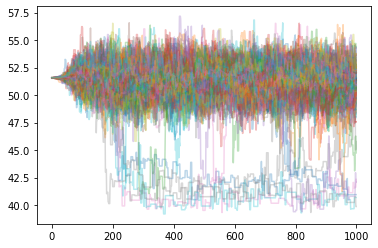

In [16]:
p = plt.plot(sampler.sampler.get_chain()[:,:,0], alpha=0.3)

In [25]:
s = sampler.sampler.get_chain(flat=True, discard=500, thin=20) # get samples remove burn in and thin.

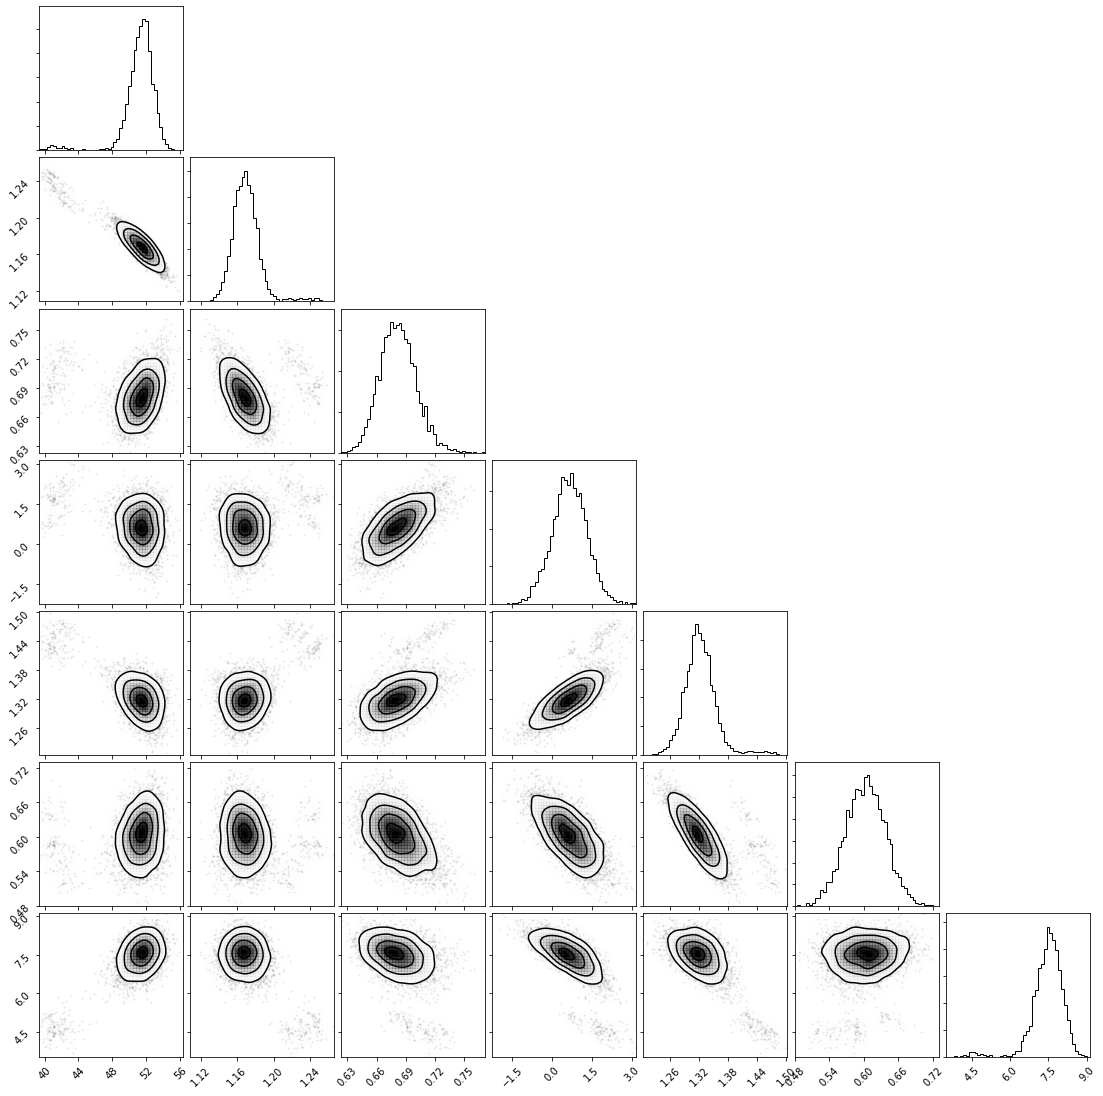

In [26]:
p = corner.corner(s, bins=50, smooth=1.5)

Lets plot the cross sections credibility intervals. First we have to rerun FRESCO
on the samples

In [41]:
all_cs = []
for ele in s:
    model.run_fresco(ele)
    cs_temp = pfunk.fresco_classes.read_cross('fort.201')
    all_cs.append(cs_temp)

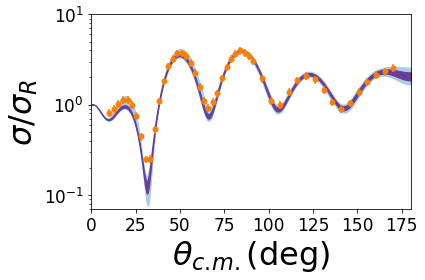

In [52]:
d = model.likelihood[0].data
pfunk.utilities.plot_ci(all_cs, data=d)
plt.ylim(0.07, 10.0)
plt.ylabel('$\sigma / \sigma_R$')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.tight_layout()

Let's zoom in to get a better view.

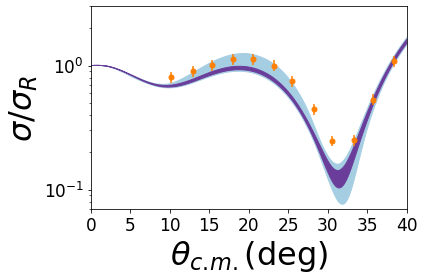

In [53]:
pfunk.utilities.plot_ci(all_cs, data=d)
plt.xlim(0.0, 40.0)
plt.ylim(0.07, 3.0)
plt.ylabel('$\sigma / \sigma_R$')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.tight_layout()

It is obvious that there are several issues with this fit. These will be examined in the next few sections.